# Exploratory data analysis

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
!pip install streamlit
!pip install pyngrok

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
!kaggle datasets download -d shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
 99% 98.0M/98.8M [00:04<00:00, 33.2MB/s]
100% 98.8M/98.8M [00:04<00:00, 25.5MB/s]


In [ ]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [ ]:
# read data
data=pd.read_csv("/content/mitbih_train.csv",header=None)

In [ ]:
# to read test data
test_data=pd.read_csv("/content/mitbih_test.csv",header=None)

In [ ]:
# to show all rows
pd.set_option("display.max_rows",None)

In [ ]:
# to show all columns
pd.set_option("display.max_columns", None)

In [ ]:
# show first 5 rows
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,0.147059,0.132353,0.127451,0.134804,0.137255,0.112745,0.107843,0.105392,0.107843,0.098039,0.093137,0.102941,0.100490,0.105392,0.102941,0.117647,0.105392,0.122549,0.127451,0.142157,0.147059,0.144608,0.174020,0.230392,0.237745,0.247549,0.230392,0.225490,0.198529,0.176471,0.132353,0.125000,0.117647,0.122549,0.112745,0.129902,0.115196,0.083333,0.000000,0.066176,0.306373,0.612745,0.860294,1.000000,0.958333,0.745098,0.303922,0.164216,0.205882,0.164216,0.102941,0.095588,0.090686,0.100490,0.095588,0.098039,0.093137,0.098039,0.095588,0.112745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,0.108262,0.082621,0.079772,0.074074,0.014245,0.011396,0.062678,0.051282,0.056980,0.048433,0.028490,0.031339,0.076923,0.025641,0.028490,0.037037,0.094017,0.085470,0.039886,0.059829,0.074074,0.079772,0.091168,0.099715,0.108262,0.088319,0.091168,0.065527,0.085470,0.088319,0.076923,0.082621,0.096866,0.099715,0.133903,0.102564,0.039886,0.065527,0.074074,0.082621,0.085470,0.056980,0.045584,0.102564,0.039886,0.011396,0.017094,0.031339,0.005698,0.008547,0.031339,0.051282,0.056980,0.088319,0.065527,0.011396,0.056980,0.039886,0.039886,0.025641,0.002849,0.019943,0.025641,0.011396,0.028490,0.019943,0.022792,0.034188,0.014245,0.051282,0.068376,0.139601,0.287749,0.527066,0.777778,1.000000,0.888889,0.492877,0.190883,0.088319,0.062678,0.034188,0.00000,0.034188,0.017094,0.002849,0.000000,0.048433,0.048433,0.054131,0.042735,0.054131,0.059829,0.062678,0.071225,0.076923,0.099715,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,0.054054,0.037838,0.043243,0.021622,0.045946,0.035135,0.056757,0.035135,0.037838,0.032432

In [ ]:
# show last 5 row from the data
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,0.305263,0.294737,0.294737,0.284211,0.270175,0.287719,0.259649,0.259649,0.266667,0.263158,0.249123,0.273684,0.263158,0.263158,0.245614,0.270175,0.256140,0.256140,0.252632,0.252632,0.238596,0.245614,0.231579,0.235088,0.235088,0.238596,0.235088,0.235088,0.214035,0.238596,0.217544,0.217544,0.221053,0.224561,0.214035,0.217544,0.210526,0.228070,0.207018,0.207018,0.210526,0.210526,0.203509,0.214035,0.200000,0.214035,0.207018,0.214035,0.207018,0.221053,0.210526,0.235088,0.249123,0.431579,1.000000,0.505263,0.529825,0.550877,0.568421,0.554386,0.536842,0.442105,0.315789,0.185965,0.000000,0.066667,0.112281,0.129825,0.164912,0.217544,0.154386,0.126316,0.115789,0.119298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.621667,0.636667,0.651667,0.665000,0.681667,0.700000,0.711667,0.735000,0.763333,0.785000,0.810000,0.835000,0.856667,0.876667,0.880000,0.881667,0.865000,0.836667,0.808333,0.758333,0.708333,0.668333,0.623333,0.586667,0.545000,0.520000,0.518333,0.510000,0.498333,0.503333,0.500000,0.501667,0.501667,0.501667,0.498333,0.505000,0.505000,0.498333,0.498333,0.500000,0.483333,0.483333,0.485000,0.480000,0.478333,0.486667,0.485000,0.486667,0.481667,0.480000,0.480000,0.480000,0.473333,0.478333,0.483333,0.478333,0.466667,0.466667,0.465000,0.466667,0.468333,0.471667,0.475000,0.476667,0.471667,0.473333,0.475000,0.481667,0.471667,0.481667,0.491667,0.503333,0.556667,0.916667,1.000000,0.840000,0.760000,0.665000,0.560000,0.465000,0.356667,0.233333,0.140000,0.078333,0.048333,0.036667,0.050000,0.081667,0.155000,0.246667,0.280000,0.330000,0.380000,0.440000,0.483333,0.521667,0.548333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,0.097959,0.048980,0.036735,0.053061,0.053061,0.097959,0.183673,0.269388,0.351020,0.408163,0.436735,0.469388,0.481633,0.518367,0.530612,0.534694,0.555102,0.591837,0.628571,0.632653,0.624490,0.616327,0.616327,0.608163,0.608163,0.620408,0.628571,0.624490,0.632653,0.644898,0.644898,0.644898,0.653061,0.661224,0.669388,0.677551,0.685714,0.689796,0.681633,0.693878,0.689796,0.693878,0.685714,0.681633,0.669388,0.648980,0.628571,0.620408,0.604082,0.591837,0.583673,0.567347,0.551020,0.542857,0.530612,0.526531,0

In [ ]:
data.shape # (numbere of rows, number of columns)

(87554, 188)

In [ ]:
# to show information for data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
# to see if data contains on any null values
data.isnull().sum().sum()

0

data not contain on any null values

In [ ]:
# to delete any row duplicates
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(87554, 188)

In [ ]:
data.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
      dtype='int64', length=188)

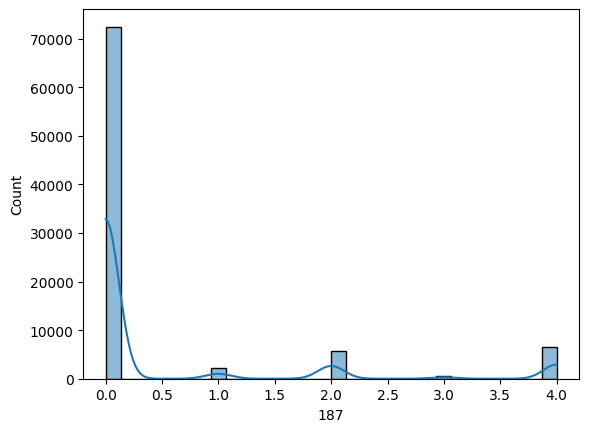

In [ ]:
import seaborn as sns

# Plot histogram for a specific numerical column
sns.histplot(data[187], bins=30, kde=True)
plt.show()

from the graph most values from 0 to 0.2

In [ ]:
# Drop columns unnecessary
data.drop(data.columns[data.columns.get_loc(100):-1], axis=1, inplace=True)

print(data.shape)

(87554, 101)


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,0.147059,0.132353,0.127451,0.134804,0.137255,0.112745,0.107843,0.105392,0.107843,0.098039,0.093137,0.102941,0.100490,0.105392,0.102941,0.117647,0.105392,0.122549,0.127451,0.142157,0.147059,0.144608,0.174020,0.230392,0.237745,0.247549,0.230392,0.225490,0.198529,0.176471,0.132353,0.125000,0.117647,0.122549,0.112745,0.129902,0.115196,0.083333,0.000000,0.066176,0.306373,0.612745,0.860294,1.000000,0.958333,0.745098,0.303922,0.164216,0.205882,0.164216,0.102941,0.095588,0.090686,0.100490,0.095588,0.098039,0.093137,0.098039,0.095588,0.112745,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,0.108262,0.082621,0.079772,0.074074,0.014245,0.011396,0.062678,0.051282,0.056980,0.048433,0.028490,0.031339,0.076923,0.025641,0.028490,0.037037,0.094017,0.085470,0.039886,0.059829,0.074074,0.079772,0.091168,0.099715,0.108262,0.088319,0.091168,0.065527,0.085470,0.088319,0.076923,0.082621,0.096866,0.099715,0.133903,0.102564,0.039886,0.065527,0.074074,0.082621,0.085470,0.056980,0.045584,0.102564,0.039886,0.011396,0.017094,0.031339,0.005698,0.008547,0.031339,0.051282,0.056980,0.088319,0.065527,0.011396,0.056980,0.039886,0.039886,0.025641,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,0.054054,0.037838,0.043243,0.021622,0.045946,0.035135,0.056757,0.035135,0.037838,0.032432,0.043243,0.037838,0.051351,0.029730,0.048649,0.029730,0.056757,0.051351,0.078378,0.064865,0.094595,0.097297,0.116216,0.094595,0.091892,0.064865,0.067568,0.040541,0.048649,0.018919,0.021622,0.008108,0.029730,0.010811,0.021622,0.005405,0.032432,0.018919,0.021622,0.040541,0.240541,0.589189,0.964865,0.583784,0.121622,0.000000,0.035135,0.035135,0.027027,0.021622,0.029730,0.010811,0.032432,0.021622,0.051351,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,0.000000,0.005525,0.022099,0.066298,0.080110,0.058011,0.060773,0.058011,0.099448,0.124309,0.174033,0.196133,0.229282,0.240331,0.265193,0.237569,0.218232,0.198895,0.198895,0.198895,0.171271,0.162983,0.185083,0.196133,0.171271,0.140884,0.085635,0.000000,0.005525,0.002762,0.035912,0.049724,0.063536,0.110497,0.121547,0.138122,0.140884,0.168508,0.389503,0.765193,1.000000,0.853591,0.668508,0.458564,0.320442,0.193370,0.121547,0.080110,0.082873,0.071823,0.058011,0.066298,0.088398,0.096685,0.099448,0.110497,0.000000,0.000000,0.000000,0.000000,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.11737

In [ ]:
data.shape

(87554, 101)

In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,0.121901,0.107438,0.105372,0.097107,0.105372,0.099174,0.105372,0.099174,0.107438,0.107438,0.115702,0.111570,0.121901,0.111570,0.119835,0.111570,0.113636,0.111570,0.121901,0.105372,0.107438,0.101240,0.101240,0.086777,0.092975,0.084711,0.082645,0.078512,0.078512,0.070248,0.076446,0.068182,0.078512,0.070248,0.068182,0.068182,0.074380,0.072314,0.090909,0.101240,0.107438,0.105372,0.121901,0.115702,0.109504,0.097107,0.103306,0.097107,0.086777,0.072314,0.070248,0.053719,0.057851,0.049587,0.057851,0.051653,0.055785,0.053719,0.053719,0.000000,0.012397,0.188017,0.681818,0.975207,0.615702,0.041322,0.012397,0.086777,0.066116,0.066116,0.051653,0.039256,0.043388,0.033058,0.041322,0.035124,0.045455,0.041322,0.045455,0.043388,0.049587,0.047521,0.06405,0.068182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,0.373626,0.366300,0.318681,0.311355,0.326007,0.311355,0.315018,0.322344,0.344322,0.344322,0.333333,0.304029,0.307692,0.282051,0.271062,0.285714,0.263736,0.274725,0.282051,0.267399,0.278388,0.289377,0.293040,0.289377,0.289377,0.289377,0.293040,0.282051,0.267399,0.256410,0.252747,0.216117,0.223443,0.238095,0.216117,0.267399,0.417582,0.582418,0.615385,0.622711,0.761905,0.864469,1.000000,0.908425,0.673993,0.315018,0.153846,0.120879,0.098901,0.043956,0.021978,0.021978,0.029304,0.000000,0.010989,0.029304,0.014652,0.021978,0.043956,0.087912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,0.092920,0.106195,0.106195,0.123894,0.097345,0.123894,0.119469,0.141593,0.132743,0.154867,0.146018,0.168142,0.159292,0.163717,0.168142,0.168142,0.163717,0.181416,0.185841,0.199115,0.176991,0.203540,0.190265,0.203540,0.194690,0.212389,0.203540,0.2123

In [ ]:
# to change data type for this column
data[187]=data[187].astype(int)

In [ ]:
# to show data type for this column
data[187].dtypes

dtype('int64')

In [ ]:
# to show count classes in this column
data[187].value_counts()

,count
187,
0,72471
4,6431
2,5788
1,2223
3,641


In [ ]:
data[187]=[0 if num==0 else 1 for num in data[187]]

In [ ]:
data[187].value_counts()

,count
187,
0,72471
1,15083


In [ ]:
y=data[187].values

In [ ]:
x=data.drop([187],axis=1)

In [ ]:
print(x.shape)
print(y.shape)

(87554, 100)
(87554,)


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

ros = RandomOverSampler(random_state=42)

X_res, y_res = ros.fit_resample(x, y)

print('Resampled dataset shape %s' % Counter(y))

print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({0: 72471, 1: 15083})
Resampled dataset shape Counter({0: 72471, 1: 72471})


In [ ]:
# to split data
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [ ]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# # building model
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(random_state=91)

In [ ]:
y_pred=XGB_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14513
           1       0.99      0.99      0.99     14476

    accuracy                           0.99     28989
   macro avg       0.99      0.99      0.99     28989
weighted avg       0.99      0.99      0.99     28989



[[14342   171]
 [  137 14339]]


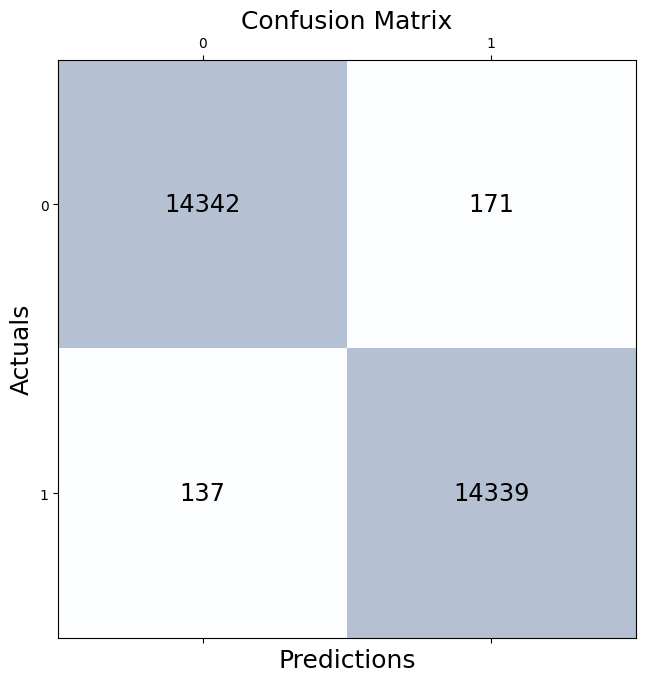

In [ ]:
print(confusion_matrix(y_test,y_pred))

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn import metrics
accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'model Accuracy - : {100*accracy:.3} %')
print (f'model f1_score - : {100*f1_score:.3} %')
print (f'model precision - : {100*precision:.3} %')
print (f'model recall - : {100*recall:.3}  %')

model Accuracy - : 98.9 %
model f1_score - : 98.9 %
model precision - : 98.8 %
model recall - : 99.1  %


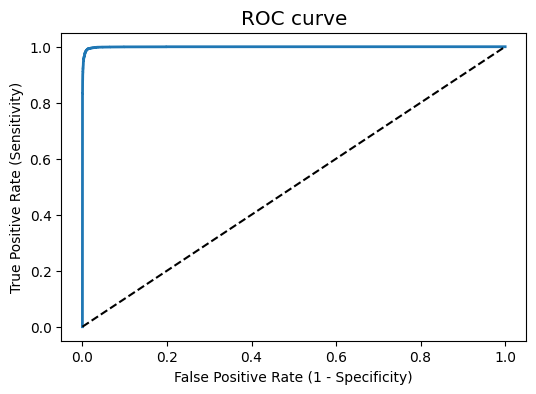

In [ ]:
# plot ROC Curve
y_pred1 = XGB_model.predict_proba(x_test)[::,1]

# y_pred1 = y_pred1.reshape(-1,1)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9992


In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,0.121901,0.107438,0.105372,0.097107,0.105372,0.099174,0.105372,0.099174,0.107438,0.107438,0.115702,0.111570,0.121901,0.111570,0.119835,0.111570,0.113636,0.111570,0.121901,0.105372,0.107438,0.101240,0.101240,0.086777,0.092975,0.084711,0.082645,0.078512,0.078512,0.070248,0.076446,0.068182,0.078512,0.070248,0.068182,0.068182,0.074380,0.072314,0.090909,0.101240,0.107438,0.105372,0.121901,0.115702,0.109504,0.097107,0.103306,0.097107,0.086777,0.072314,0.070248,0.053719,0.057851,0.049587,0.057851,0.051653,0.055785,0.053719,0.053719,0.000000,0.012397,0.188017,0.681818,0.975207,0.615702,0.041322,0.012397,0.086777,0.066116,0.066116,0.051653,0.039256,0.043388,0.033058,0.041322,0.035124,0.045455,0.041322,0.045455,0.043388,0.049587,0.047521,0.06405,0.068182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,0.373626,0.366300,0.318681,0.311355,0.326007,0.311355,0.315018,0.322344,0.344322,0.344322,0.333333,0.304029,0.307692,0.282051,0.271062,0.285714,0.263736,0.274725,0.282051,0.267399,0.278388,0.289377,0.293040,0.289377,0.289377,0.289377,0.293040,0.282051,0.267399,0.256410,0.252747,0.216117,0.223443,0.238095,0.216117,0.267399,0.417582,0.582418,0.615385,0.622711,0.761905,0.864469,1.000000,0.908425,0.673993,0.315018,0.153846,0.120879,0.098901,0.043956,0.021978,0.021978,0.029304,0.000000,0.010989,0.029304,0.014652,0.021978,0.043956,0.087912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,0.092920,0.106195,0.106195,0.123894,0.097345,0.123894,0.119469,0.141593,0.132743,0.154867,0.146018,0.168142,0.159292,0.163717,0.168142,0.168142,0.163717,0.181416,0.185841,0.199115,0.176991,0.203540,0.190265,0.203540,0.194690,0.212389,0.203540,0.2123

In [ ]:
test_data[187]=test_data[187].astype(int)

In [ ]:
test_data[187].dtype

dtype('int64')

In [ ]:
test_data[187]=[0 if num==0 else 1 for num in test_data[187]]

In [ ]:
test_data[187].value_counts()

,count
187,
0,18118
1,3774


In [ ]:
x_test1=test_data.drop([187],axis=1)

In [ ]:
y_test1=test_data[[187]].values

In [ ]:
x_test1 = x_test1.drop(x_test1.columns[100:187], axis=1)

In [ ]:
x_test1.shape

(21892, 100)

In [ ]:
y_test1.shape

(21892, 1)

In [ ]:
y_pred_test = XGB_model.predict(x_test1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.95      0.93      0.94      3774

    accuracy                           0.98     21892
   macro avg       0.97      0.96      0.96     21892
weighted avg       0.98      0.98      0.98     21892



[[17919   199]
 [  256  3518]]


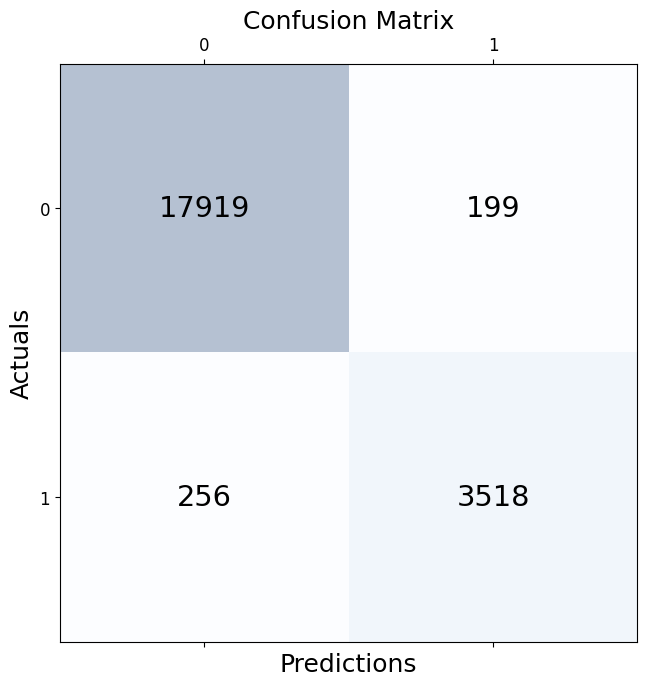

In [ ]:
print(confusion_matrix(y_test1,y_pred_test))

conf_matrix = confusion_matrix(y_true=y_test1, y_pred=y_pred_test)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
accracy = metrics.accuracy_score(y_test1, y_pred_test)
f1_score = metrics.f1_score(y_test1, y_pred_test)
precision = metrics.precision_score(y_test1, y_pred_test)
recall = metrics.recall_score(y_test1, y_pred_test)

print (f'model Accuracy - : {100*accracy:.3} %')
print (f'model f1_score - : {100*f1_score:.3} %')
print (f'model precision - : {100*precision:.3} %')
print (f'model recall - : {100*recall:.3}  %')

model Accuracy - : 97.9 %
model f1_score - : 93.9 %
model precision - : 94.6 %
model recall - : 93.2  %


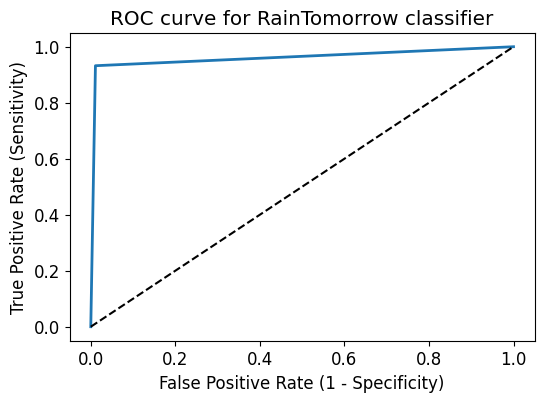

In [ ]:
# plot ROC Curve
y_pred1 = XGB_model.predict_proba(x_test1)[::,1]

# y_pred1 = y_pred1.reshape(-1,1)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test1, y_pred_test) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [ ]:
import pickle

# Save your trained model (after training)
with open('heartbeat_model.pkl', 'wb') as f:
    pickle.dump(XGB_model,f)

# Load the model
with open('heartbeat_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.81.254.190


In [61]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.81.254.190:8501

your url is: https://fancy-rice-greet.loca.lt
  Stopping...
^C
